## Artificial Neurons, rules, etc.
---
This will be in Java, I like programming languages better than Python.

We will explain here several asoects of a neural network:
- [Rules](#A-"Classical"-way-to-program-a-rule)
- [Neurons](#Neurons!)
- [With activation function](#With-an-Activation-Function)

> Note: Press Shift + Enter to execute a cell and navigate to the next one.

Enjoy!

### A "Classical" way to program a rule
We can define a `static` method, remember we are in a REPL.

In [7]:
enum RiskLevel {
    RED,
    YELLOW,
    GREEN
}

static RiskLevel rule(int age, int speed, int mpy) {
    if (age < 25) {
        if (speed > 140) {
            return RiskLevel.RED;
        } else {
            return RiskLevel.YELLOW;
        }
    }
    
    if (age > 75) {
        return RiskLevel.RED;
    }
    if (mpy >30) { 
        return RiskLevel.RED;
    }
    if (mpy > 20) {
        return RiskLevel.YELLOW;
    }
    return RiskLevel.GREEN;
}

int age = 60;
int speed = 100;
int mpy = 30;
RiskLevel rate = rule(age, speed, mpy);
System.out.println(String.format("- %d years old driver\n- driving %d Kmiles a year\n- in a car that goes up to %d mph\n=> Rate: %s", age, mpy, speed, rate.toString()));



- 60 years old driver
- driving 30 Kmiles a year
- in a car that goes up to 100 mph
=> Rate: YELLOW


## Neurons!

![Neuron at work](./img/neuron.example.png)

Above is the example we've seen in the transcript.
We have 3 dimensions:
- X<sub><small>1</small></sub> with weight `1.5`
- X<sub><small>2</small></sub> with weight `-2`
- X<sub><small>3</small></sub> with weight `1`

The bias is `+6`

Below is a Java implementation.
If we set X<sub><small>1</small></sub> to `10`, X<sub><small>2</small></sub> to `6` and X<sub><small>3</small></sub> to `8`, we find y = `17`.

In [8]:
import java.util.Arrays;
import java.util.List;
/**
 * Basic example of a Java Artificial Neuron
 */
public class ArtificialNeuron {
  private double bias = 0;
  private List<Double> weights;
  
  public ArtificialNeuron(List<Double> weights, double bias) {
    this.weights = weights;
    this.bias = bias;
  }
  
  public double compute(List<Double> xValues) {

    if (xValues.size() != this.weights.size()) {
      throw new RuntimeException("Size mismatch");
    }
    double yValue = 0;
    for (int i=0; i<xValues.size(); i++) {
      yValue += (xValues.get(i) * this.weights.get(i));
    }
    yValue += this.bias;
    return yValue;
  }
}

ArtificialNeuron neuron = new ArtificialNeuron(
    Arrays.asList(new Double[] { 1.5, -2d, 1d }), 
    6d);

try {
  double y = neuron.compute(Arrays.asList(new Double[]{ 10d, 6d, 8d }));
  System.out.println(String.format("=> y = %f", y));
  // An  other try, with different values
  y = neuron.compute(Arrays.asList(new Double[]{ 1d, 6d, 2d }));
  System.out.println(String.format("=> y = %f", y));  
} catch (Exception ex) {
  ex.printStackTrace();
}


=> y = 17.000000
=> y = -2.500000


### With an Activation Function
We will use the `Function<>` object, available since Java 8, to process the Activation. Look where the `compute` method is invoked, the Activation Function is one of the parameters.

Here we use Java's standard `Math::tanh`. We can use any Function, standard or custom. All it need is to comply with the signature `Function<Double, Double>`.

In [9]:
import java.util.Arrays;
import java.util.List;
import java.util.function.Function;
/**
 * With an Activation Function (Hyperbolic Tangent)
 */
public class NeuronWithActivationFunction extends ArtificialNeuron {
   
  public NeuronWithActivationFunction(List<Double> weights, double bias) {
    super(weights, bias);
  }

  // We add a compute method, with a different signature
  public double compute(List<Double> xValues, Function<Double, Double> activation) 
      throws Exception {
    double y = super.compute(xValues);
    // Activation function here
    return activation.apply(y);
  }
}

// Invoking the new class
NeuronWithActivationFunction neuron = new NeuronWithActivationFunction(
    Arrays.asList(new Double[] { 1.5, -2d, 1d }), 
    6d);

try {
  // See how we pass the Activation Function to the compute method of the neuron
  System.out.println(String.format("=> y = %f", neuron.compute(Arrays.asList(new Double[]{ 10d, 6d, 8d }), Math::tanh)));
  // An other try, with different values
  System.out.println(String.format("=> y = %f", neuron.compute(Arrays.asList(new Double[]{ 1d, 6d, 2d }), Math::tanh)));

} catch (Exception ex) {
  ex.printStackTrace();
}

=> y = 1.000000
=> y = -0.986614


### 4 Types of Activation Function
#### Hyperbolic Tangent

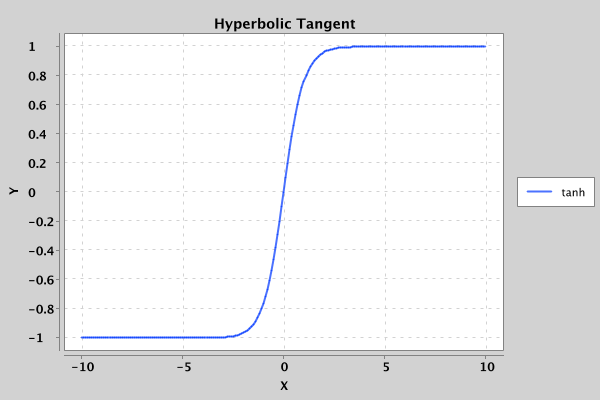

In [10]:
%maven org.knowm.xchart:xchart:3.5.4
import org.knowm.xchart.*;
import java.util.stream.DoubleStream;
import java.util.stream.Collectors;

// Hyperbolic Tangent
List<Double> xList = DoubleStream.iterate(-10, n -> n + 0.1)
    .limit(201)
    .boxed()
    .collect(Collectors.toList());
double[] xData = xList.stream()
    .mapToDouble(Double::doubleValue)
    .toArray();
double[] yData = xList.stream()
    .mapToDouble(Math::tanh)
    .toArray();

XYChart tanh = QuickChart.getChart(
    "Hyperbolic Tangent", // Chart title
    "X",                  // x axis label
    "Y",                  // y axis label
    "tanh",               // Legend
    xData,                // x axis data 
    yData);               // y axis data
// Render the chart
BitmapEncoder.getBufferedImage(tanh);


#### Step Function

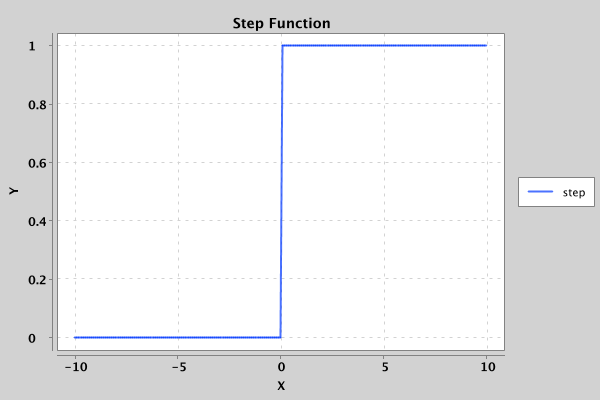

In [6]:
double[] yData = xList.stream()
    .mapToDouble(Double::doubleValue)
    .map(x -> x < 0 ? 0 : 1)
    .toArray();

// Step Function
XYChart step = QuickChart.getChart(
    "Step Function",      // Chart title
    "X",                  // x axis label
    "Y",                  // y axis label
    "step",               // Legend
    xData,                // x axis data 
    yData);               // y axis data
// Render the chart
BitmapEncoder.getBufferedImage(step);

##### Rectified Linear Unit

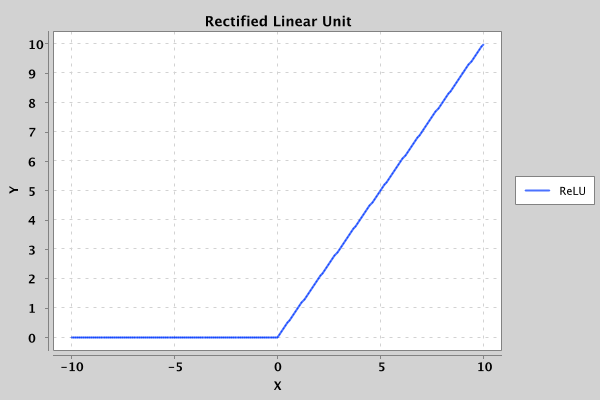

In [7]:
double[] yData = xList.stream()
    .mapToDouble(Double::doubleValue)
    .map(x -> x < 0 ? 0 : x)
    .toArray();

// Rectified Linear Unit
XYChart relu = QuickChart.getChart(
    "Rectified Linear Unit", // Chart title
    "X",                     // x axis label
    "Y",                     // y axis label
    "ReLU",                  // Legend
    xData,                   // x axis data 
    yData);                  // y axis data
// Render the chart
BitmapEncoder.getBufferedImage(relu);

##### Sigmoid

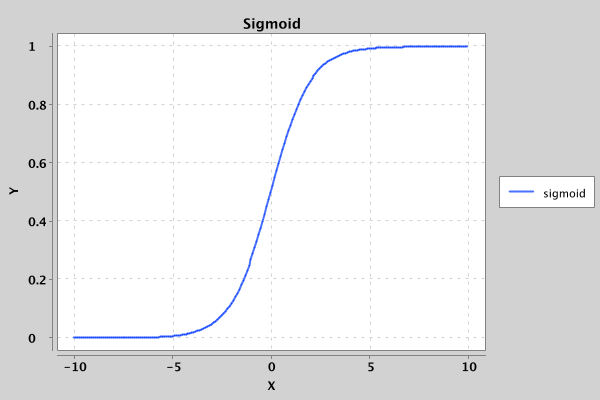

In [8]:
double[] yData = xList.stream()
    .mapToDouble(Double::doubleValue)
    .map(x -> (1 / (1 + Math.exp(-x))))
    .toArray();

// Sigmoid
XYChart sigmoid = QuickChart.getChart(
    "Sigmoid",            // Chart title
    "X",                  // x axis label
    "Y",                  // y axis label
    "sigmoid",            // Legend
    xData,                // x axis data 
    yData);               // y axis data
// Render the chart
BitmapEncoder.getBufferedImage(sigmoid);

#### Same neuron as above, activated by a Sigmoid, or something else

In [19]:
NeuronWithActivationFunction neuron = new NeuronWithActivationFunction(
    Arrays.asList(new Double[] { 1.5, -2d, 1d }), 
    6d);

// Here we define the activation functions, as static members of a class
public class ActivationFunctions {
  public static Double sigmoid(Double input) {
        return (1 / (1 + Math.exp(-input)));
  }
  public static Double step(Double input) {
      return input < 0d ? 0d : 1d;
  }
  public static Double relu(Double input) {
      return input < 0d ? 0d : input;
  }
  public static Double tanh(Double input) {
      return Math.tanh(input);
  }
}

// We define an enumeration, to make sure we do not refer to a non-exiting function
enum AF {
    SIGMOID(ActivationFunctions::sigmoid),
    STEP_FUNC(ActivationFunctions::step),
    RELU(ActivationFunctions::relu),
    TANH(ActivationFunctions::tanh);
    
    private Function<Double, Double> af;
    
    AF(Function<Double, Double> af) {
        this.af = af;
    }
    
    public Function<Double, Double> af() {
        return this.af;
    }
} 

Double[][] testValues = new Double[][] {
  new Double[]{ 10d, 6d, 8d },
  new Double[]{ 1d, 6d, 2d }
}; 
        
// We loop on the values of the enum
for (AF af : AF.values()) {    
    try {
      // See how we pass the Activation Function to the compute method of the neuron, af.af()
      for (Double[] array : testValues) {  
        List<Double> values = Arrays.asList(array);
        System.out.println(String.format("%s(%s) \t=> y = %f", 
            af.toString(), 
            values.stream()
                .map(String::valueOf)
                .collect(Collectors.joining(", ")),
            neuron.compute(values, af.af())));
      }
    } catch (Exception ex) {
      ex.printStackTrace();
    }
}

SIGMOID(10.0, 6.0, 8.0) 	=> y = 1.000000
SIGMOID(1.0, 6.0, 2.0) 	=> y = 0.075858
STEP_FUNC(10.0, 6.0, 8.0) 	=> y = 1.000000
STEP_FUNC(1.0, 6.0, 2.0) 	=> y = 0.000000
RELU(10.0, 6.0, 8.0) 	=> y = 17.000000
RELU(1.0, 6.0, 2.0) 	=> y = 0.000000
TANH(10.0, 6.0, 8.0) 	=> y = 1.000000
TANH(1.0, 6.0, 2.0) 	=> y = -0.986614
